# Generating Random Points

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
y1 = []
for i in range (0,999):
    y1.append(random.uniform(5,6))
x1= []
for i in range (0,999):
    x1.append(random.uniform(12,13))
y = np.array(y1)
x = np.array(x1)

# Building Linear Regression Model

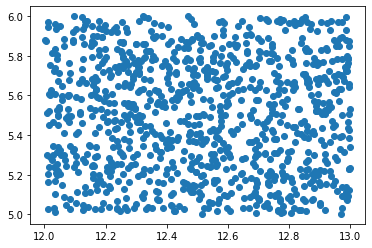

In [32]:
plt.scatter(x,y)
plt.show()

In [33]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    B0 = y_mean - (B1*x_mean)
    
    return (B0, B1)

In [34]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [35]:
B0, B1 = linear_regression(x, y)
print('line is : ',B0,'+',B1,'X')
R = corr_coef(x, y)
print('Correlation Coefficient: ', R)
print('"Goodness of Fit": ', R**2)

line is :  5.671574609115027 + -0.013758810146906941 X
Correlation Coefficient:  -0.0140049837454555
"Goodness of Fit":  0.00019613956971047277


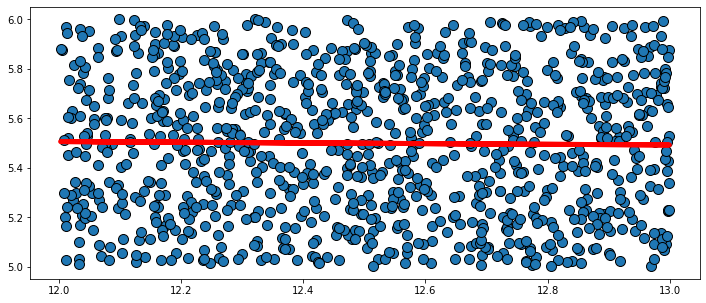

In [36]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=100, linewidths=1, edgecolor='black')
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, )

# Gradient Descent

In [37]:
m = 0
c = 0
Learn_rate = 0.001
epochs = 1000 

n = float(len(x))
for i in range(epochs): 
    y_pred = m*x + c 
    m_dash = (-2/n) * sum(x * (y - y_pred))
    c_dash = (-2/n) * sum(y - y_pred) 
    m = m - Learn_rate * m_dash
    c = c - Learn_rate * c_dash  
print ('optimal slope :',m,'\noptimal intercept value = ',c)

optimal slope : 0.4360352989574978 
optimal intercept value =  0.04083883665510864


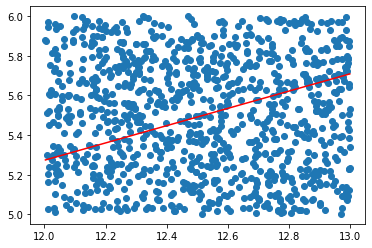

In [38]:
y_pred = m*x + c
plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')
plt.show()

# SKlearn Linear Regression

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


In [51]:
X_test = X_test.reshape(-1,1)

In [52]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)


In [56]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(xtrain, y_train)
print(regr.score(X_test, y_test))

-0.02376606413210114


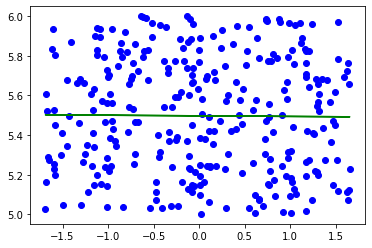

In [58]:
y_pred = regr.predict(xtest)
plt.scatter(xtest, y_test, color ='b')
plt.plot(xtest, y_pred, color ='g')
plt.show()

In [60]:
print(regr.score(X_test, y_test))

-0.02376606413210114


In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2531097471583049
MSE: 0.08377423850591618
RMSE: 0.28943779730006963
